In [33]:
# CIFAR - 10 veri seti  ile Image Classification 
#CIFAR-10 veri seti, makine öğrenimi ve bilgisayarla görme algoritmalarını eğitmek için yaygın olarak kullanılan bir görüntü koleksiyonudur. 
#Makine öğrenimi araştırması için en yaygın kullanılan veri kümelerinden biridir.
## Kedi REsimlerini Kategorileyip Classification Model Oluşturuyoruz.

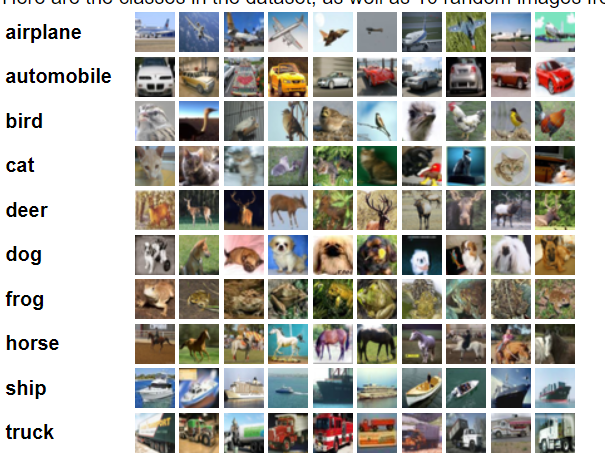

In [2]:
## Kütüphanalerin Yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [7]:
# EDA

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
X_train[0].shape

(32, 32, 3)

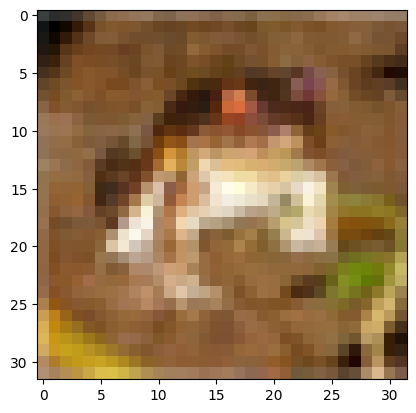

In [9]:
plt.imshow(X_train[0])

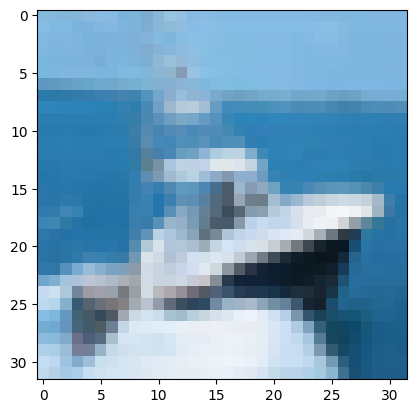

In [14]:
plt.imshow(X_train[8])

In [15]:
X_train = X_train/255

In [16]:
X_test = X_test/255

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_cat_train  = to_categorical(y_train, 10)

In [52]:
print(y_cat_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [19]:
y_cat_test = to_categorical(y_test, 10)

In [53]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

In [32]:
model.fit(X_train, y_cat_train, validation_data = (X_test, y_cat_test), epochs = 15, callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 76s 48ms/step - loss: 1.4992 - accuracy: 0.4504 - val_loss: 1.2296 - val_accuracy: 0.5612
Epoch 2/15
1563/1563 [==============================] - 73s 46ms/step - loss: 1.1070 - accuracy: 0.6055 - val_loss: 1.0397 - val_accuracy: 0.6385
Epoch 3/15
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9176 - accuracy: 0.6795 - val_loss: 0.9870 - val_accuracy: 0.6592
Epoch 4/15
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7783 - accuracy: 0.7261 - val_loss: 0.9201 - val_accuracy: 0.6839
Epoch 5/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6527 - accuracy: 0.7725 - val_loss: 0.9669 - val_accuracy: 0.6809
Epoch 6/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.5411 - accuracy: 0.8103 - val_loss: 0.9625 - val_accuracy: 0.6929


In [34]:
metrics = pd.DataFrame(model.history.history)

In [35]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.499161,0.45038,1.229580,0.5612
1,1.106959,0.60550,1.039747,0.6385
2,0.917611,0.67950,0.987019,0.6592
3,0.778326,0.72610,0.920086,0.6839
4,0.652698,0.77246,0.966897,0.6809
5,0.541129,0.81032,0.962543,0.6929


In [36]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

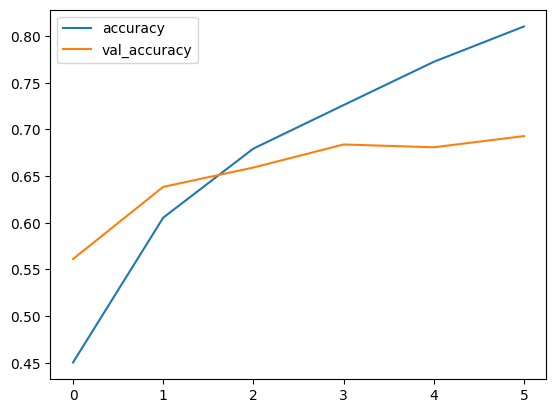

In [37]:
metrics[["accuracy", "val_accuracy"]].plot()

<Axes: >

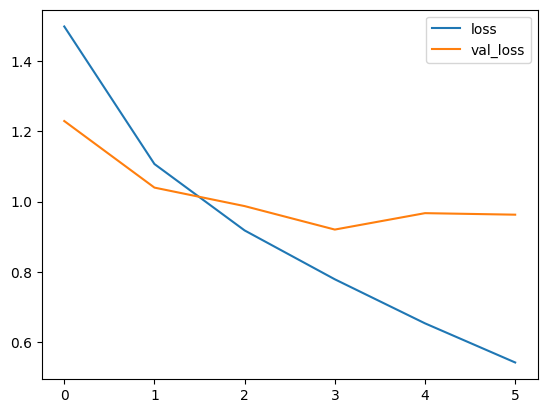

In [38]:
metrics[["loss", "val_loss"]].plot()

In [39]:
model.evaluate(X_test, y_cat_test, verbose = 1)

313/313 [==============================] - 5s 15ms/step - loss: 0.9625 - accuracy: 0.6929


[0.9625433683395386, 0.6929000020027161]

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 4s 13ms/step


In [42]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.82      0.80      0.81      1000
           2       0.69      0.50      0.58      1000
           3       0.50      0.48      0.49      1000
           4       0.62      0.69      0.66      1000
           5       0.62      0.58      0.60      1000
           6       0.69      0.83      0.75      1000
           7       0.74      0.75      0.75      1000
           8       0.74      0.82      0.78      1000
           9       0.79      0.72      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [43]:
confusion_matrix(y_test, classes_x)

array([[754,  19,  43,  20,  17,   8,  11,  14,  86,  28],
       [ 31, 803,   4,  19,   2,  10,  19,   6,  38,  68],
       [ 67,   6, 496,  74, 111,  67, 100,  38,  31,  10],
       [ 30,   9,  46, 478,  91, 160,  99,  45,  32,  10],
       [ 24,   0,  45,  55, 695,  29,  55,  69,  17,  11],
       [ 15,   2,  29, 178,  57, 576,  50,  66,  15,  12],
       [  9,   5,  23,  43,  51,  15, 832,   5,  13,   4],
       [ 16,   3,  21,  48,  69,  43,  19, 749,   8,  24],
       [ 68,  24,   7,  18,   6,   8,  10,   4, 825,  30],
       [ 38, 112,   8,  19,  15,   8,  14,  13,  52, 721]])

<Axes: >

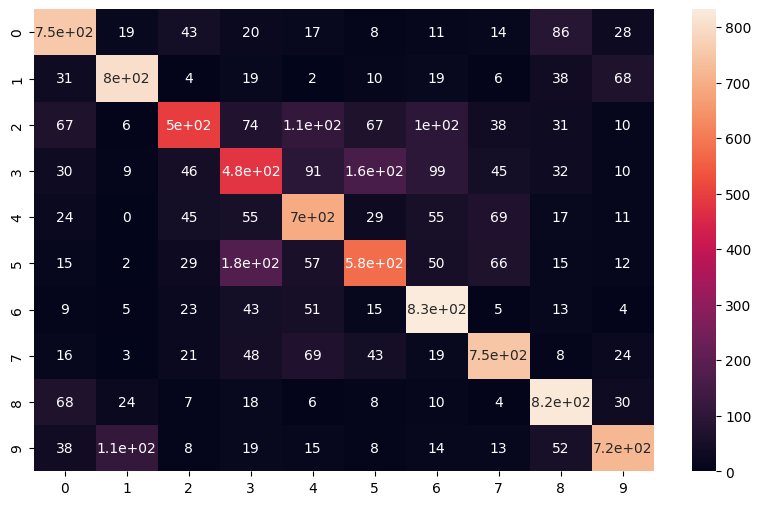

In [44]:
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_test, classes_x), annot = True)

In [45]:
my_image = X_test[0]

In [46]:
my_image

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

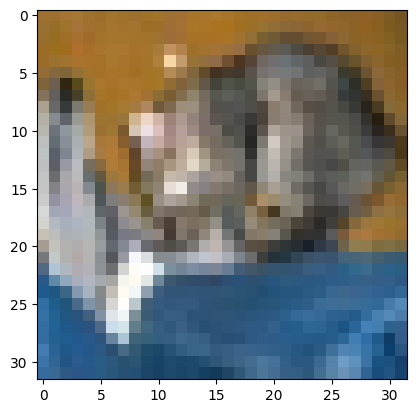

In [47]:
plt.imshow(my_image)

In [48]:
y_test[0]

array([3], dtype=uint8)

In [50]:
model.predict(my_image.reshape(1, 32, 32, 3))

1/1 [==============================] - 0s 139ms/step


array([[5.8255246e-04, 3.7253622e-03, 3.7710769e-03, 7.4244845e-01,
        2.3502265e-03, 2.2507992e-01, 1.8146550e-02, 1.1016793e-03,
        1.6902760e-03, 1.1039848e-03]], dtype=float32)